# **Projet 3 : Prédiction de la consommation d'énergie de la ville de Seattle**

## **Data Preprossessing**

### **Import des packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Chargement des données**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Projet 3/2016_Building_Energy_Benchmarking.csv")

Mounted at /content/drive


In [3]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


### **Affichage des colonnes du dataset**

In [4]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

### **Informations sur les features**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
df.shape

(3376, 46)

### **Affichage du taux de NAN par feature**

In [7]:
NA = pd.DataFrame(data=[df.isnull().sum().tolist(), ["{:.2f}".format(i)+'%'
                                                            for i in (df.isna().sum()/df.shape[0]*100).tolist()]],
                  columns=df.columns, index=['NA Count', 'NA Percent']).transpose()

NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,NA Percent
OSEBuildingID,0,0.00%
DataYear,0,0.00%
BuildingType,0,0.00%
PrimaryPropertyType,0,0.00%
PropertyName,0,0.00%
Address,0,0.00%
City,0,0.00%
State,0,0.00%
ZipCode,16,0.47%
TaxParcelIdentificationNumber,0,0.00%


### **Suppression des bâtiments à usage residentiel**

In [8]:
df.drop(df.loc[df["BuildingType"] == "Multifamily LR (1-4)"].index, inplace=True)
df.drop(df.loc[df["BuildingType"] == "Multifamily MR (5-9)"].index, inplace=True)
df.drop(df.loc[df["BuildingType"] == "Multifamily HR (10+)"].index, inplace=True)

In [9]:
df.drop(df.loc[df["PrimaryPropertyType"] == "Residence Hall"].index, inplace=True)
df.drop(df.loc[df["PrimaryPropertyType"] == "Low-Rise Multifamily"].index, inplace=True)

In [10]:
df.drop(df.loc[df["LargestPropertyUseType"] == "Multifamily Housing"].index, inplace=True)
df.drop(df.loc[df["LargestPropertyUseType"] == "Other - Lodging/Residential "].index, inplace=True)
df.drop(df.loc[df["LargestPropertyUseType"] == "Residence Hall/Dormitory"].index, inplace=True)
df.drop(df.loc[df["LargestPropertyUseType"] == "Residential Care Facility "].index, inplace=True)
df.drop(df.loc[df["LargestPropertyUseType"] == "Other - Lodging/Residential "].index, inplace=True)

### **Sélection des bâtiments conformes avec la variable CompliancesStatus**

In [11]:
df1 = df.loc[(df['ComplianceStatus']== 'Compliant')]

###**Selection des features nécessaires à notre projet**

In [12]:
data = df1[[ 'PrimaryPropertyType', 'BuildingType','Neighborhood', 'YearBuilt',
            'NumberofBuildings', 'NumberofFloors','PropertyGFATotal',
            'PropertyGFAParking','LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)',
            'SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus' , 'TotalGHGEmissions', 'GHGEmissionsIntensity']]

In [13]:
data

,PrimaryPropertyType,BuildingType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,Hotel,NonResidential,DOWNTOWN,1927,1.0,12,88434,0,Hotel,88434.0,7.456910e+06,84.300003,2003882.00,3.946027e+06,1.276453e+06,Compliant,249.98,2.83
1,Hotel,NonResidential,DOWNTOWN,1996,1.0,11,103566,15064,Hotel,83880.0,8.664479e+06,97.900002,0.00,3.242851e+06,5.145082e+06,Compliant,295.86,2.86
2,Hotel,NonResidential,DOWNTOWN,1969,1.0,41,956110,196718,Hotel,756493.0,7.393711e+07,97.699997,21566554.00,4.952666e+07,1.493800e+06,Compliant,2089.28,2.19
3,Hotel,NonResidential,DOWNTOWN,1926,1.0,10,61320,0,Hotel,61320.0,6.946800e+06,113.300003,2214446.25,2.768924e+06,1.811213e+06,Compliant,286.43,4.67
4,Hotel,NonResidential,DOWNTOWN,1980,1.0,18,175580,62000,Hotel,123445.0,1.465650e+07,118.699997,0.00,5.368607e+06,8.803998e+06,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Other,Nonresidential COS,DELRIDGE NEIGHBORHOODS,1982,1.0,1,18261,0,Other - Recreation,18261.0,1.025432e+06,56.200001,0.00,6.323620e+05,2.997200e+05,Compliant,20.33,1.11
3372,Other,Nonresidential COS,DOWNTOWN,2004,1.0,1,16000,0,Other - Recreation,16000.0,1.053706e+06,65.900002,0.00,3.965461e+05,5.537300e+05,Compliant,32.17,2.01
3373,Other,Nonresidential COS,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,Other - Recreation,7583.0,6.053764e+06,460.100006,0.00,1.792159e+06,3.973739e+06,Compliant,223.54,16.99
3374,Mixed Use Property,Nonresidential COS,GREATER DUWAMISH,1989,1.0,1,14101,0,Other - Recreation,6601.0,7.828413e+05,55.500000,0.00,3.488702e+05,3.706010e+05,Compliant,22.11,1.57


### **Création d'une variable : proportion du parking**

In [14]:
data['Parking_pro'] = data['PropertyGFAParking']/data['PropertyGFATotal']*100

<ipython-input-14-a2b1b6a320bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Parking_pro'] = data['PropertyGFAParking']/data['PropertyGFATotal']*100


### **Création d'une variable : proportion de la plus importante utilisation**

In [15]:
data['LargestUse_pro'] = data['LargestPropertyUseTypeGFA']/data['PropertyGFATotal']*100

<ipython-input-15-290bf5f8f83a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LargestUse_pro'] = data['LargestPropertyUseTypeGFA']/data['PropertyGFATotal']*100


### **Création des variables relatives à la proportion de chaque type d'énergie sur l'énergie totale**

In [16]:
data['Pro_vap'] = data['SteamUse(kBtu)']/data['SiteEnergyUseWN(kBtu)']*100
data['Pro_elec'] = data['Electricity(kBtu)']/data['SiteEnergyUseWN(kBtu)']*100
data['Pro_gaz'] = data['NaturalGas(kBtu)']/data['SiteEnergyUseWN(kBtu)']*100

<ipython-input-16-459083fc1097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pro_vap'] = data['SteamUse(kBtu)']/data['SiteEnergyUseWN(kBtu)']*100
<ipython-input-16-459083fc1097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pro_elec'] = data['Electricity(kBtu)']/data['SiteEnergyUseWN(kBtu)']*100
<ipython-input-16-459083fc1097>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

### **Suppression des features inutiles pour la suite du projet**

In [17]:
data.drop(columns=['BuildingType', 'PropertyGFAParking', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus'], axis=1, inplace=True)

<ipython-input-17-511e2d3a9e44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['BuildingType', 'PropertyGFAParking', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus'], axis=1, inplace=True)


### **Affichage des doublons ayant les mêmes information sur l'ensemble des features**

In [18]:
print('Il y a' , data.duplicated(keep=False).sum(), 'dans notre jeu de données')

Il y a 0 dans notre jeu de données


### **Nettoyage des NAN**

In [19]:
NA = pd.DataFrame(data=[data.isnull().sum().tolist(), ["{:.2f}".format(i)+'%'
                                                            for i in (data.isna().sum()/data.shape[0]*100).tolist()]],
                  columns=data.columns, index=['NA Count', 'NA Percent']).transpose()

NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,NA Percent
PrimaryPropertyType,0,0.00%
Neighborhood,0,0.00%
YearBuilt,0,0.00%
NumberofBuildings,0,0.00%
NumberofFloors,0,0.00%
PropertyGFATotal,0,0.00%
LargestPropertyUseType,4,0.26%
LargestPropertyUseTypeGFA,4,0.26%
SiteEnergyUseWN(kBtu),1,0.07%
SiteEUIWN(kBtu/sf),1,0.07%


Les proportion des lignes contenant des NAN sont très faibles.
Nous procédons tout simplement à leur suppression

### **Suppression des lignes contenant des NAN**

In [20]:
data.dropna(subset= ['LargestPropertyUseType'], inplace=True)
data.dropna(subset= ['LargestPropertyUseTypeGFA'], inplace=True)
data.dropna(subset= ['SiteEnergyUseWN(kBtu)'], inplace=True)
data.dropna(subset= ['SiteEUIWN(kBtu/sf)'], inplace=True)
data.dropna(subset= ['Pro_vap'], inplace=True)
data.dropna(subset= ['Pro_elec'], inplace=True)
data.dropna(subset= ['Pro_gaz'], inplace=True)

<ipython-input-20-8f018c6cce75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset= ['LargestPropertyUseType'], inplace=True)
<ipython-input-20-8f018c6cce75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset= ['LargestPropertyUseTypeGFA'], inplace=True)
<ipython-input-20-8f018c6cce75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset= ['SiteEnergyUseWN(kBtu)'], inplace=True)
<ipython

### **Orgaisation du feature 'YearBuilt' par tranche**

In [21]:
conditionlist = [
    (data['YearBuilt'] <= 1910),
    (data['YearBuilt'] >= 1911) & (data['YearBuilt'] <= 1920),
    (data['YearBuilt'] >= 1920) & (data['YearBuilt'] <= 1930),
    (data['YearBuilt'] >= 1931) & (data['YearBuilt'] <= 1940),
    (data['YearBuilt'] >= 1941) & (data['YearBuilt'] <= 1950),
    (data['YearBuilt'] >= 1951) & (data['YearBuilt'] <= 1960),
    (data['YearBuilt'] >= 1961) & (data['YearBuilt'] <= 1970),
    (data['YearBuilt'] >= 1971) & (data['YearBuilt'] <= 1980),
    (data['YearBuilt'] >= 1981) & (data['YearBuilt'] <= 1990),
    (data['YearBuilt'] >= 1991) & (data['YearBuilt'] <= 2000),
    (data['YearBuilt'] >= 2001) & (data['YearBuilt'] <= 2010),
    (data['YearBuilt'] >= 2011),
]
choicelist = [12,11,10,9,8,7,6,5,4,3,2,1]
data['Tranche_dates'] = np.select(conditionlist, choicelist, default="Not Specified")

<ipython-input-21-d3f25bf0186b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tranche_dates'] = np.select(conditionlist, choicelist, default="Not Specified")


### **Harmonisation des modalités du feature 'Neighborhood**

In [22]:
data['Neighborhood'].value_counts()

DOWNTOWN                  338
GREATER DUWAMISH          328
MAGNOLIA / QUEEN ANNE     140
LAKE UNION                139
EAST                      112
NORTHEAST                  98
NORTHWEST                  74
BALLARD                    57
NORTH                      51
CENTRAL                    42
DELRIDGE                   36
SOUTHWEST                  31
SOUTHEAST                  31
North                       8
Ballard                     5
Delridge                    4
Northwest                   3
Central                     3
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [23]:
data.loc[data['Neighborhood'] == 'North', 'Neighborhood'] = 'NORTH'
data.loc[data['Neighborhood'] == 'Ballard', 'Neighborhood'] = 'BALLARD'
data.loc[data['Neighborhood'] == 'Delridge', 'Neighborhood'] = 'DELRIDGE'
data.loc[data['Neighborhood'] == 'Central', 'Neighborhood'] = 'CENTRAL'
data.loc[data['Neighborhood'] == 'Northwest', 'Neighborhood'] = 'NORTHWEST'
data.loc[data['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS', 'Neighborhood'] = 'DELRIDGE'

### **Regroupement des features de type PropertyUseType par grands groupes**

In [24]:
data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Distribution Center', 'Worship Facility',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

In [25]:
data.loc[data['PrimaryPropertyType'].isin({'Small- and Mid-Sized Office', 'Large Office'}), 'PrimaryPropertyType'] = 'OFFICE'
data.loc[data['PrimaryPropertyType'].isin({'Hotel','Restaurant'}), 'PrimaryPropertyType'] = 'HOTEL_RESTAUSRATION'
data.loc[data['PrimaryPropertyType'].isin({'Hospital', 'Laboratory','Medical Office', 'Senior Care Community'}), 'PrimaryPropertyType'] = 'MEDICAL'
data.loc[data['PrimaryPropertyType'].isin({'K-12 School','University'}), 'PrimaryPropertyType'] = 'EDUCATION_FORMATION'
data.loc[data['PrimaryPropertyType'].isin({'Warehouse', 'Retail Store', 'Supermarket / Grocery Store', 'Refrigerated Warehouse'}), 'PrimaryPropertyType'] = 'MARKET_TRADE'
data.loc[data['PrimaryPropertyType'].isin({'Mixed Use Property'}), 'PrimaryPropertyType'] = 'MIXEDUSEPROPERTY'
data.loc[data['PrimaryPropertyType'].isin({'Worship Facility', 'Distribution Center', 'Self-Storage Facility', 'Other'}), 'PrimaryPropertyType'] = 'OTHER'

In [26]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'K-12 School', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Other/Specialty Hospital',
       'Financial Office', 'Distribution Center', 'Parking',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Urgent Care/Clinic/Other Outpatient',
       'Other - Services', 'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other - Recreation', 'Lifestyle Center',
       'Other - Public

In [27]:
data.loc[data['LargestPropertyUseType'].isin({'College/University', 'K-12 School', 'Other - Education','Adult Education', 'Pre-school/Daycare'}), 'LargestPropertyUseType'] = 'EDUCATION'
data.loc[data['LargestPropertyUseType'].isin({'Other - Entertainment/Public Assembly', 'Fitness Center/Health Club/Gym', 'Museum', 'Other - Recreation', 'Performing Arts', 'Movie Theater'}), 'LargestPropertyUseType'] = 'SPORT_LOISIR'
data.loc[data['LargestPropertyUseType'].isin({'Courthouse', 'Other - Public Services', 'Fire Station', 'Prison/Incarceration'}), 'LargestPropertyUseType'] = 'BUREAUX_PUBLICS'
data.loc[data['LargestPropertyUseType'].isin({'Financial Office', 'Bank Branch','Office'}), 'LargestPropertyUseType'] = 'BUREAUX_PIVES'
data.loc[data['LargestPropertyUseType'].isin({'Senior Care Community','Medical Office','Hospital (General Medical & Surgical)', 'Other/Specialty Hospital', 'Laboratory', 'Urgent Care/Clinic/Other Outpatient', 'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Residential Care Facility'}), 'LargestPropertyUseType'] = 'MEDICAL'
data.loc[data['LargestPropertyUseType'].isin({'Social/Meeting Hall', 'Other', 'Self-Storage Facility', 'Distribution Center', 'Parking', 'Worship Facility', 'Data Center', 'Other - Services', 'Lifestyle Center', 'Other - Utility', 'Other - Lodging/Residential'}), 'LargestPropertyUseType'] = 'AUTRE'
data.loc[data['LargestPropertyUseType'].isin({'Library', 'Non-Refrigerated Warehouse', 'Other - Mall', 'Retail Store', 'Automobile Dealership', 'Supermarket/Grocery Store', 'Strip Mall', 'Wholesale Club/Supercenter', 'Refrigerated Warehouse'}), 'LargestPropertyUseType'] = 'COMMERCE'
data.loc[data['LargestPropertyUseType'].isin({'Restaurant', 'Other - Restaurant/Bar', 'Food Service'}), 'LargestPropertyUseType'] = 'RESTAURANT'
data.loc[data['LargestPropertyUseType'].isin({'Hotel'}), 'LargestPropertyUseType'] = 'HOTEL'
data.loc[data['LargestPropertyUseType'].isin({ 'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Manufacturing/Industrial Plant'}), 'LargestPropertyUseType'] = 'FABRICATION_REPARATION'

## **Analyses descriptives**

### **Description des variables numeriques**

In [28]:
data

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,Parking_pro,LargestUse_pro,Pro_vap,Pro_elec,Pro_gaz,Tranche_dates
0,HOTEL_RESTAUSRATION,DOWNTOWN,1927,1.0,12,88434,HOTEL,88434.0,7.456910e+06,84.300003,249.98,2.83,0.000000,100.000000,26.872820,52.917723,17.117720,10
1,HOTEL_RESTAUSRATION,DOWNTOWN,1996,1.0,11,103566,HOTEL,83880.0,8.664479e+06,97.900002,295.86,2.86,14.545314,80.991831,0.000000,37.426959,59.381320,3
2,HOTEL_RESTAUSRATION,DOWNTOWN,1969,1.0,41,956110,HOTEL,756493.0,7.393711e+07,97.699997,2089.28,2.19,20.574829,79.121963,29.168781,66.984851,2.020366,6
3,HOTEL_RESTAUSRATION,DOWNTOWN,1926,1.0,10,61320,HOTEL,61320.0,6.946800e+06,113.300003,286.43,4.67,0.000000,100.000000,31.877211,39.858983,26.072621,10
4,HOTEL_RESTAUSRATION,DOWNTOWN,1980,1.0,18,175580,HOTEL,123445.0,1.465650e+07,118.699997,505.01,2.88,35.311539,70.306983,0.000000,36.629522,60.068885,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,OTHER,DELRIDGE,1982,1.0,1,18261,SPORT_LOISIR,18261.0,1.025432e+06,56.200001,20.33,1.11,0.000000,100.000000,0.000000,61.667856,29.228653,4
3372,OTHER,DOWNTOWN,2004,1.0,1,16000,SPORT_LOISIR,16000.0,1.053706e+06,65.900002,32.17,2.01,0.000000,100.000000,0.000000,37.633471,52.550722,2
3373,OTHER,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,SPORT_LOISIR,7583.0,6.053764e+06,460.100006,223.54,16.99,0.000000,57.634719,0.000000,29.604038,65.640794,5
3374,MIXEDUSEPROPERTY,GREATER DUWAMISH,1989,1.0,1,14101,SPORT_LOISIR,6601.0,7.828413e+05,55.500000,22.11,1.57,0.000000,46.812283,0.000000,44.564610,47.340501,4


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 0 to 3375
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PrimaryPropertyType        1501 non-null   object 
 1   Neighborhood               1501 non-null   object 
 2   YearBuilt                  1501 non-null   int64  
 3   NumberofBuildings          1501 non-null   float64
 4   NumberofFloors             1501 non-null   int64  
 5   PropertyGFATotal           1501 non-null   int64  
 6   LargestPropertyUseType     1501 non-null   object 
 7   LargestPropertyUseTypeGFA  1501 non-null   float64
 8   SiteEnergyUseWN(kBtu)      1501 non-null   float64
 9   SiteEUIWN(kBtu/sf)         1501 non-null   float64
 10  TotalGHGEmissions          1501 non-null   float64
 11  GHGEmissionsIntensity      1501 non-null   float64
 12  Parking_pro                1501 non-null   float64
 13  LargestUse_pro             1501 non-null   float

In [30]:
data.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,Parking_pro,LargestUse_pro,Pro_vap,Pro_elec,Pro_gaz
count,1501.000000,1501.000000,1501.000000,1.501000e+03,1.501000e+03,1.501000e+03,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,1961.604264,1.109260,4.241173,1.155555e+05,9.429681e+04,8.592275e+06,78.372418,188.726209,1.677841,6.524020,86.259851,2.071711,67.562044,25.334071
std,32.686643,1.211633,6.786295,1.985372e+05,1.640913e+05,2.309166e+07,76.964464,738.337923,2.437300,14.426519,31.338178,8.686313,27.165549,23.987449
min,1900.000000,0.000000,0.000000,1.128500e+04,5.656000e+03,5.811420e+04,1.500000,-0.800000,-0.020000,0.000000,18.646908,0.000000,-48.063963,0.000000
25%,1930.000000,1.000000,1.000000,2.884400e+04,2.520000e+04,1.329148e+06,37.299999,20.290000,0.360000,0.000000,67.475966,0.000000,45.857711,0.000000
50%,1965.000000,1.000000,2.000000,4.802000e+04,4.195800e+04,2.830650e+06,56.299999,49.620000,0.880000,0.000000,93.770674,0.000000,68.006857,22.019856
75%,1988.000000,1.000000,4.000000,1.051000e+05,9.164500e+04,7.668810e+06,88.699997,147.000000,1.960000,0.000000,100.000000,0.000000,95.555156,45.491579
max,2015.000000,27.000000,99.000000,2.200000e+06,1.719643e+06,4.716139e+08,834.400024,16870.980000,34.090000,89.502252,642.684902,64.773098,103.872233,97.077764


A travers cette description, on remarque la présence de valeurs aberantes et d'outliers au sein de certaines features. On peut citer entre autres le pourcentage maximal de l'énegie électrique qui est de 103%, le percentage négatif de l'énergie électrique, les émissions de CO2 en valeur négatives

### **Description des variables catégoriques**

In [31]:
data.describe(include ='object')

,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,Tranche_dates
count,1501,1501,1501,1501
unique,7,13,11,12
top,OFFICE,DOWNTOWN,BUREAUX_PIVES,6
freq,449,338,488,213


### **Suppression des bâtiment avec un nombre d'étages > 100**

In [32]:
data.drop(data.loc[(data['NumberofFloors']> 76)].index, axis=0, inplace=True)

<ipython-input-32-8acfd9e3f6ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.loc[(data['NumberofFloors']> 76)].index, axis=0, inplace=True)


### **Suppression des lignes ayant des proportions négatives ou >100**

In [33]:
data.drop(data.loc[(data['TotalGHGEmissions']< 0)].index, axis=0, inplace=True)
data.drop(data.loc[(data['Pro_elec']> 100)].index, axis=0, inplace=True)


<ipython-input-33-aadf0451c794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.loc[(data['TotalGHGEmissions']< 0)].index, axis=0, inplace=True)
<ipython-input-33-aadf0451c794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.loc[(data['Pro_elec']> 100)].index, axis=0, inplace=True)


### **Visualisation de la distribution des variables**

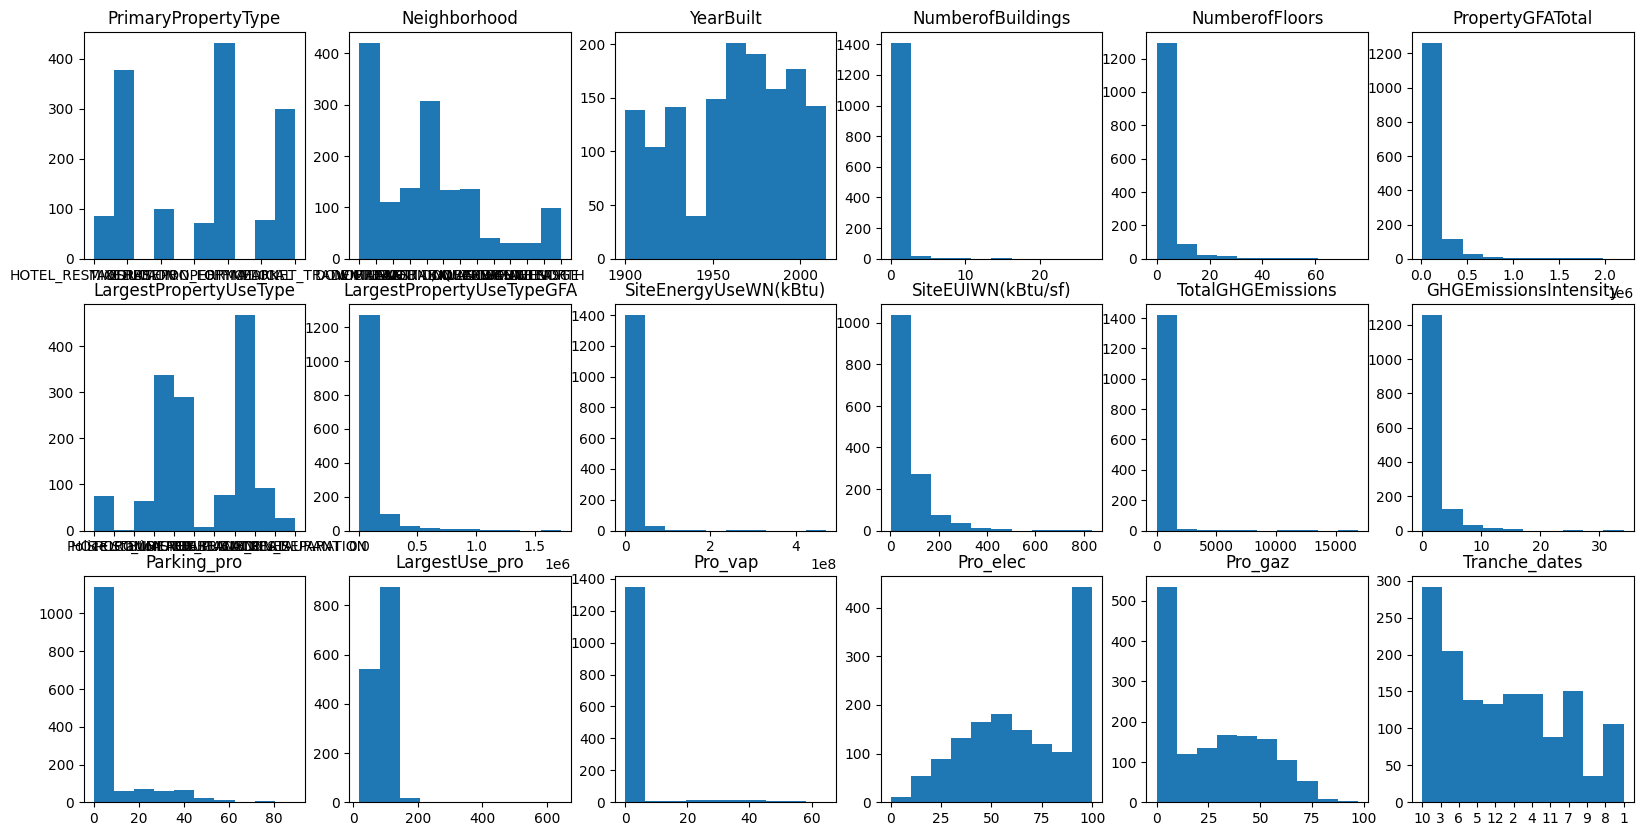

In [34]:
fig, axs = plt.subplots(3, 6, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=10)
    axs[i].set_title(column)

plt.show()

On remarque à travers ces histogrammes qu'aucune des observations n'a une distribution normale

### **Affichage des boxplots**

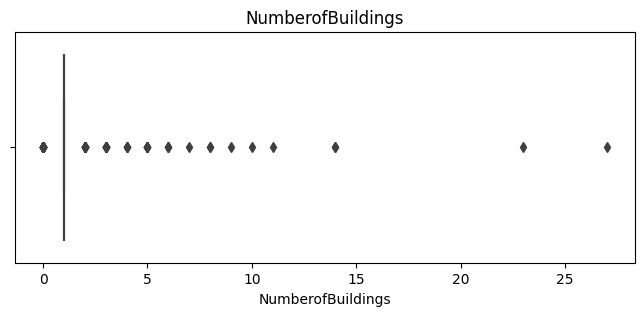

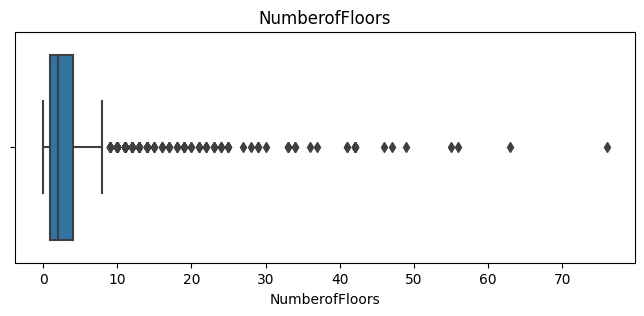

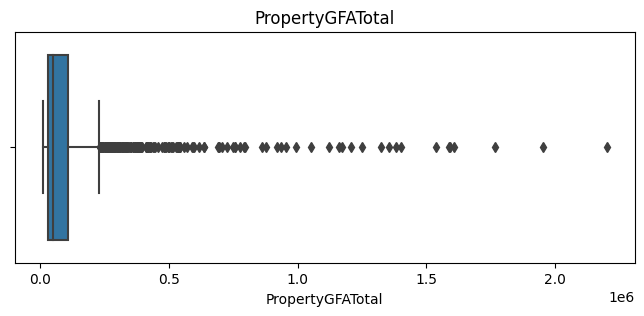

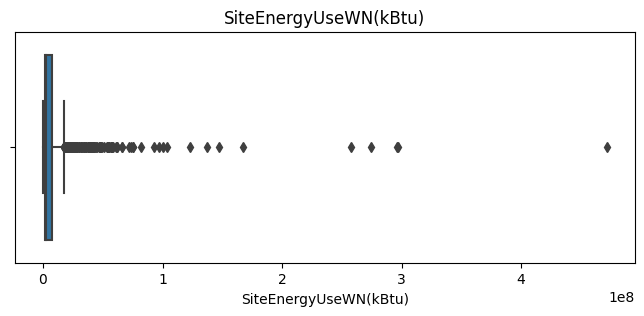

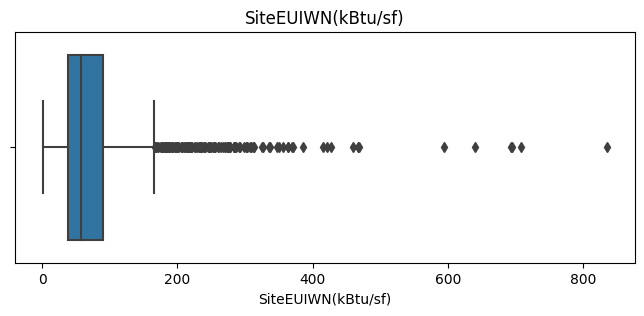

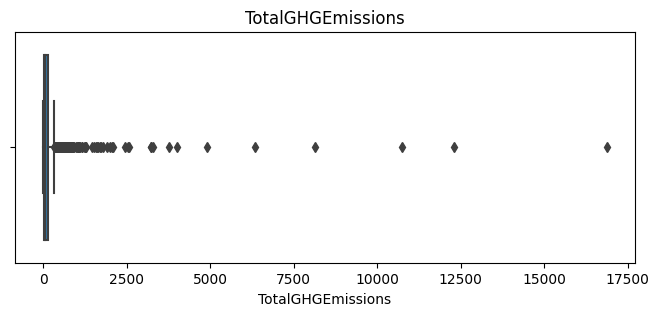

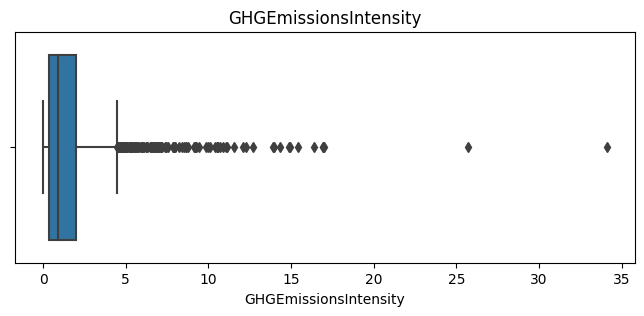

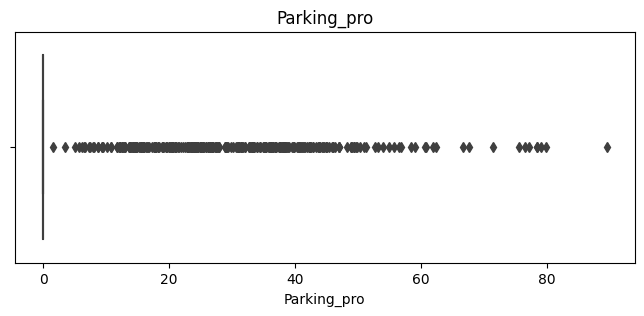

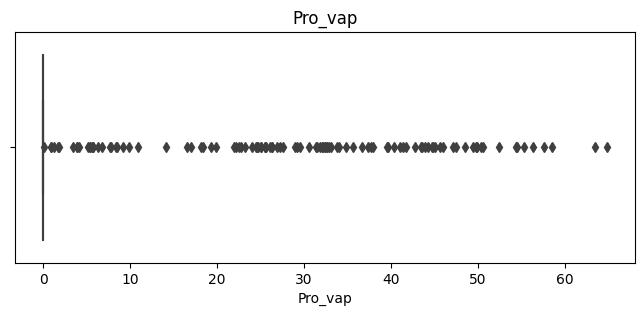

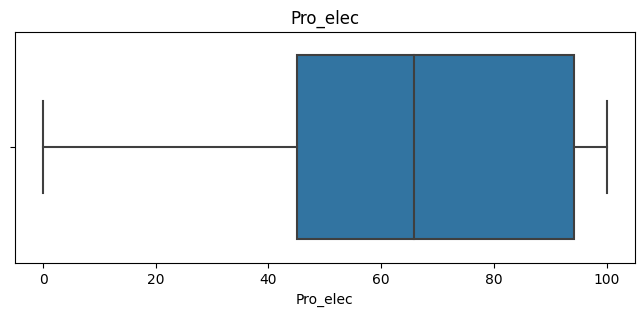

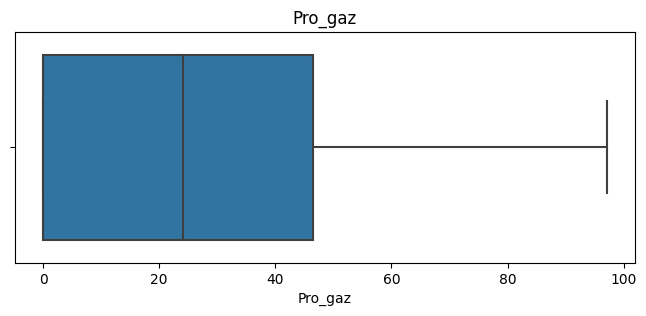

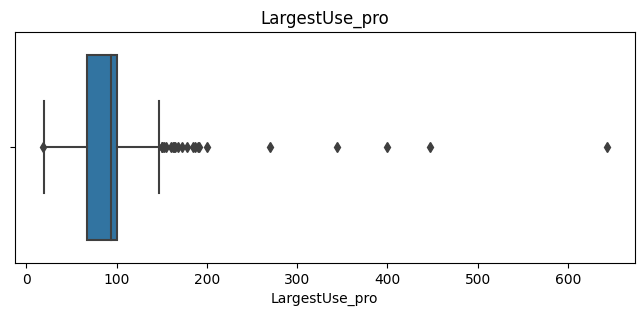

In [35]:
features = data[['NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal',
       'SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Parking_pro', 'Pro_vap', 'Pro_elec',
       'Pro_gaz', 'LargestUse_pro']]
for column in features.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=features[column], ax=ax)
    plt.title(column)
    plt.show()

De ces boxplots, on deduit la présence d'outliers. Cependant, ces outliers sont des valeurs extrêmes mais ne sont pas des valeurs aberrantes. En effet, les grandes tours et les résidences étudiantes peuvent avoir des valeurs très éloignées de celles d'un appartement ou maison individuel

<ipython-input-36-8c4f39ec342c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=bool))
<ipython-input-36-8c4f39ec342c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), mask=mask, center=0, cmap='RdYlGn',


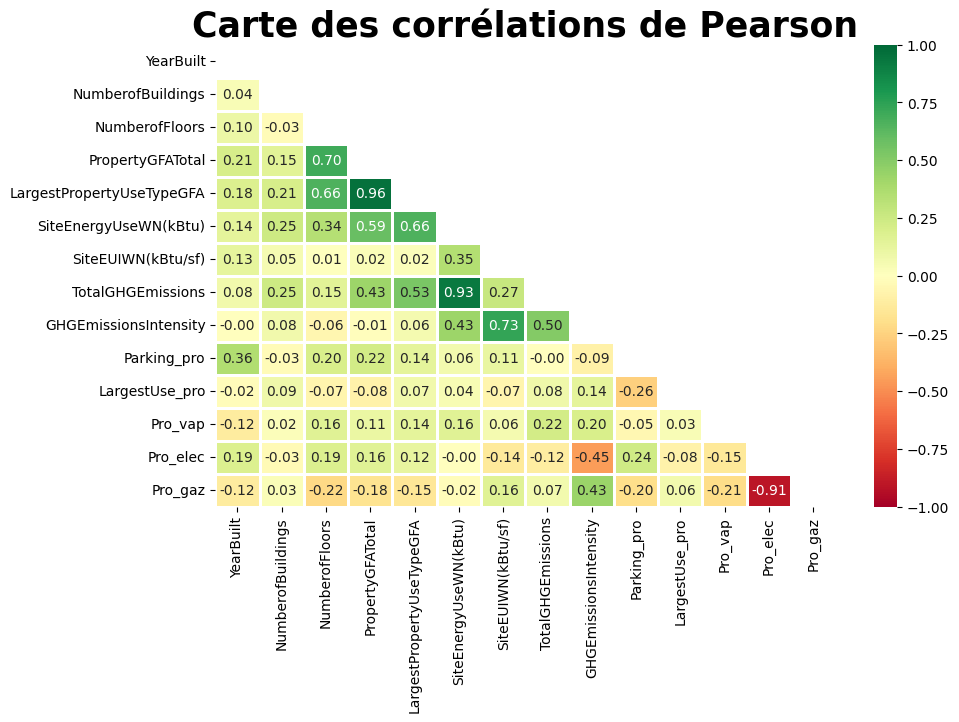

In [36]:
%matplotlib inline
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, center=0, cmap='RdYlGn',
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations de Pearson', fontsize = 25, fontweight='bold')
plt.show()

### **Visualisation des corrélations entre variables numeriques**

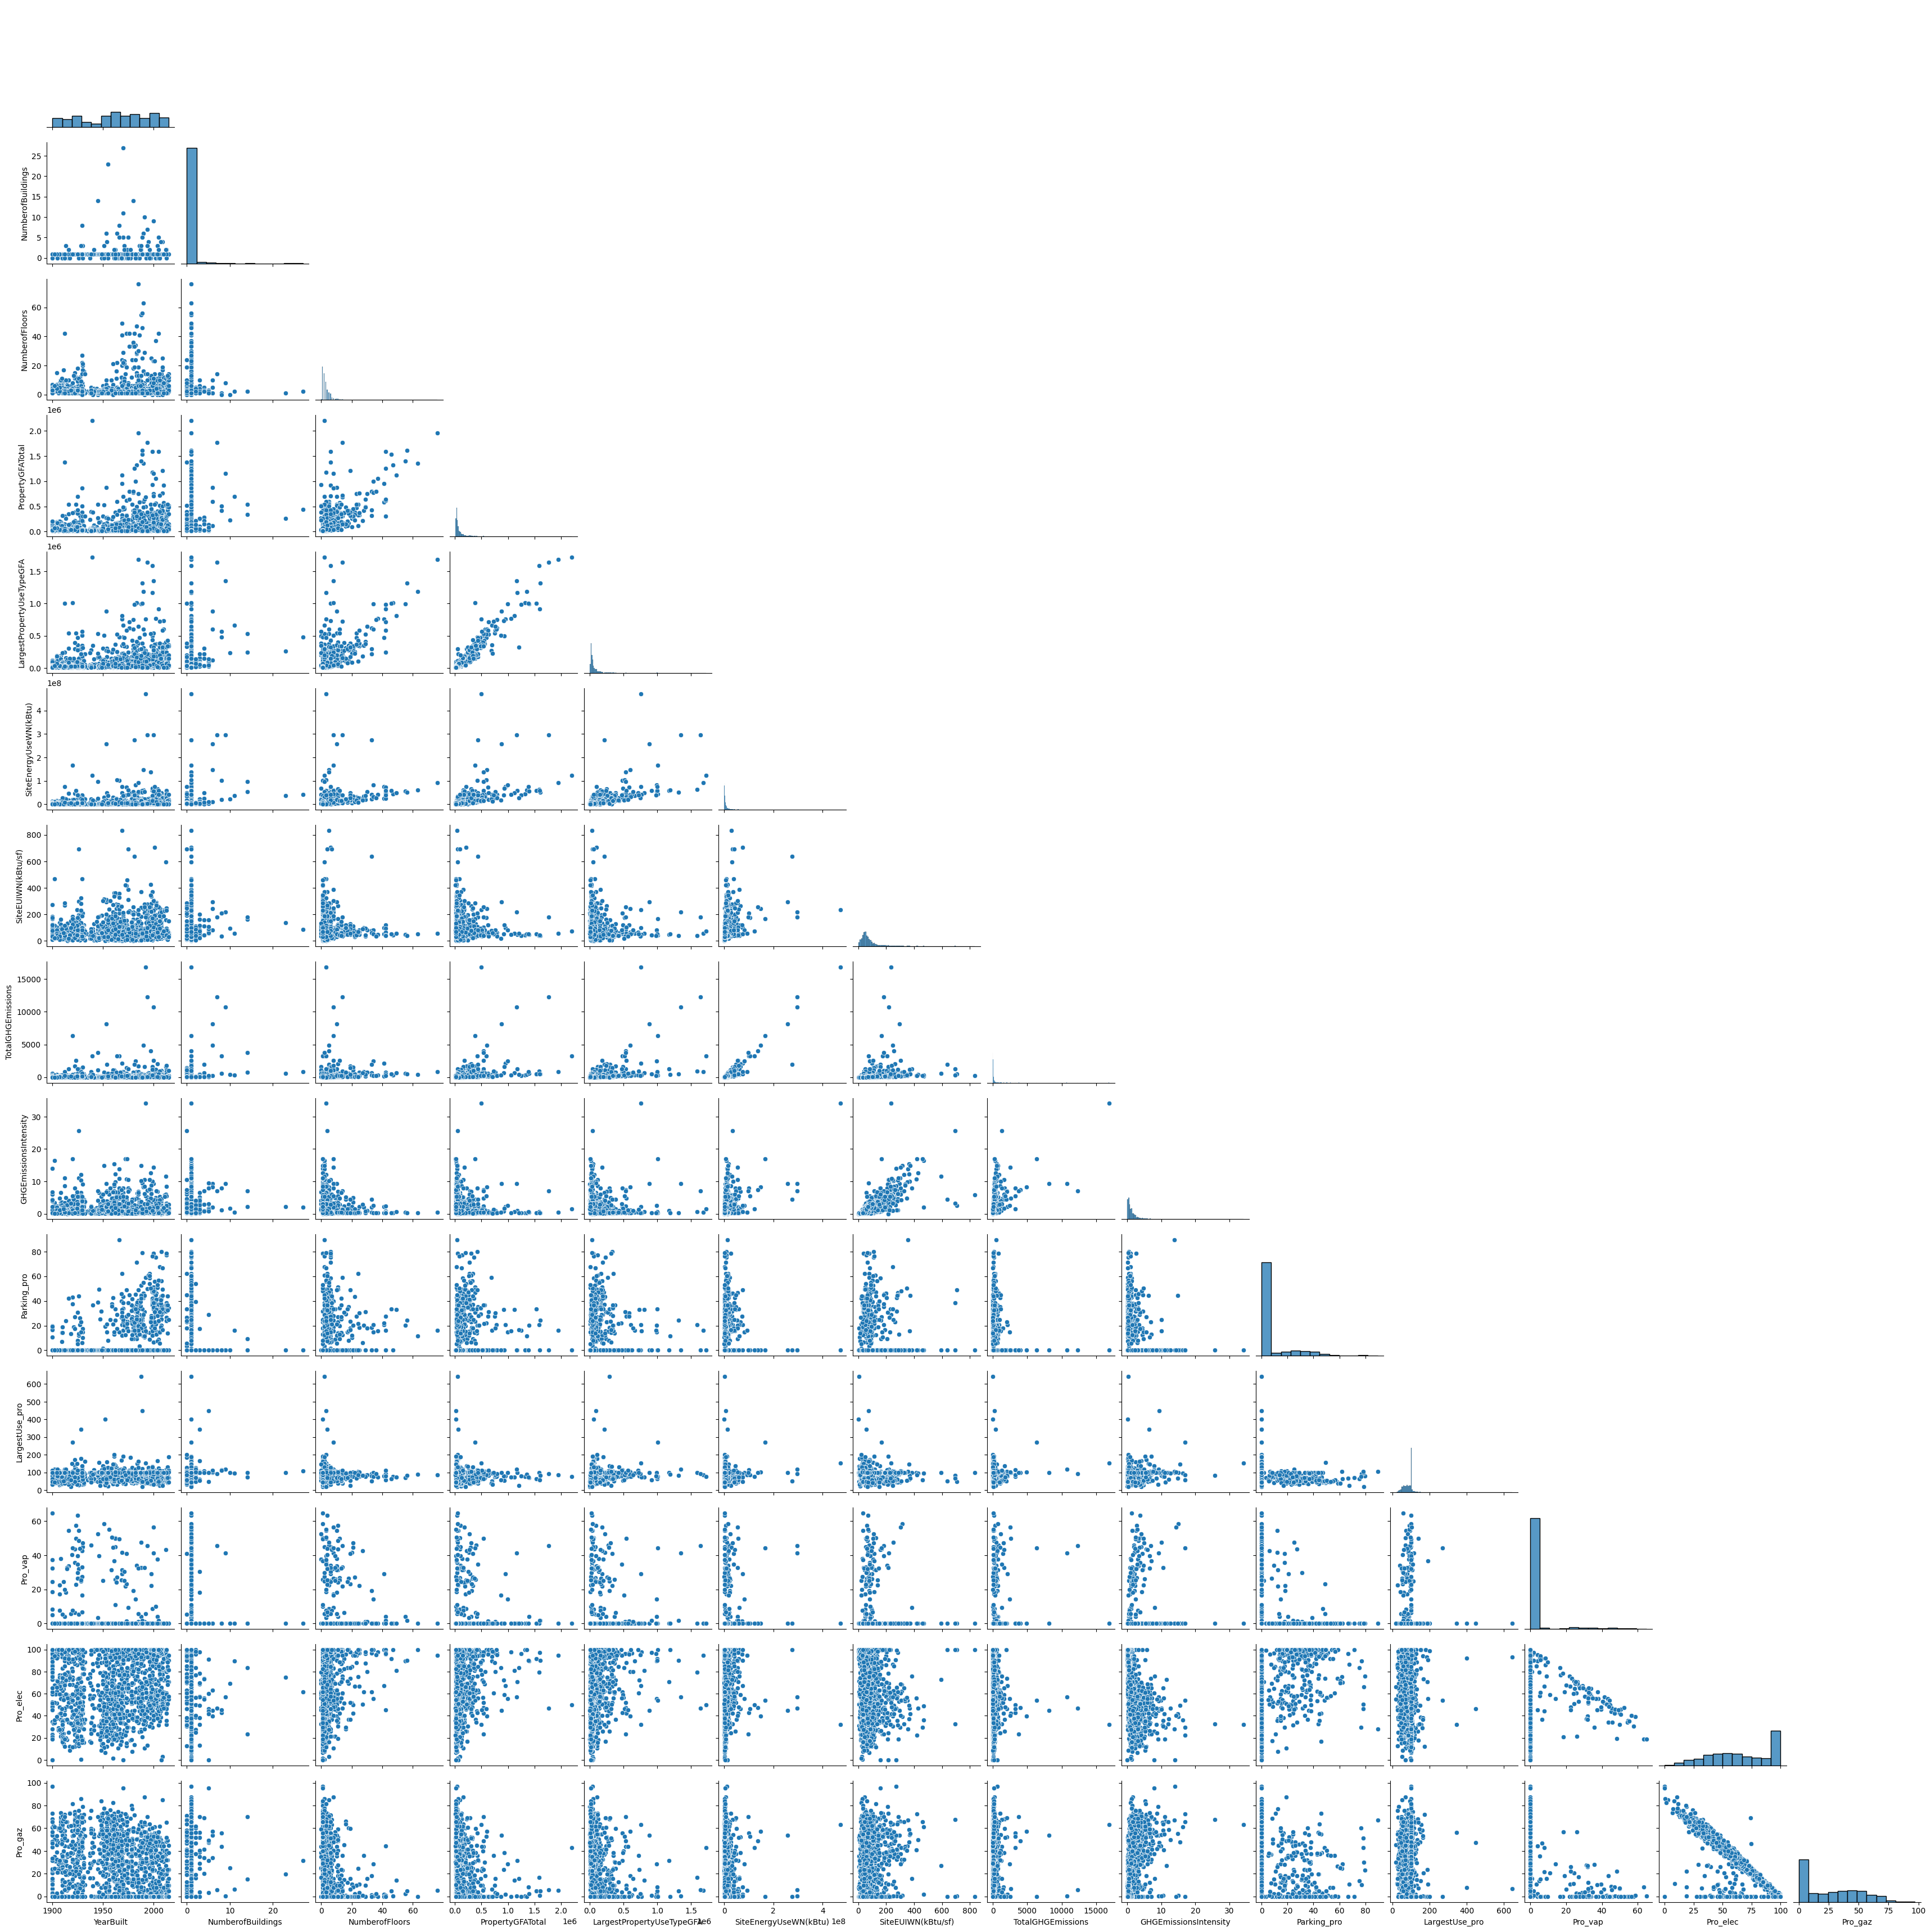

In [37]:
sns.pairplot(data, corner=True);

### **Anayse de la variabilité de la distribution de la consommation d'énergie  au sein variables categorielles (ANOVA)**

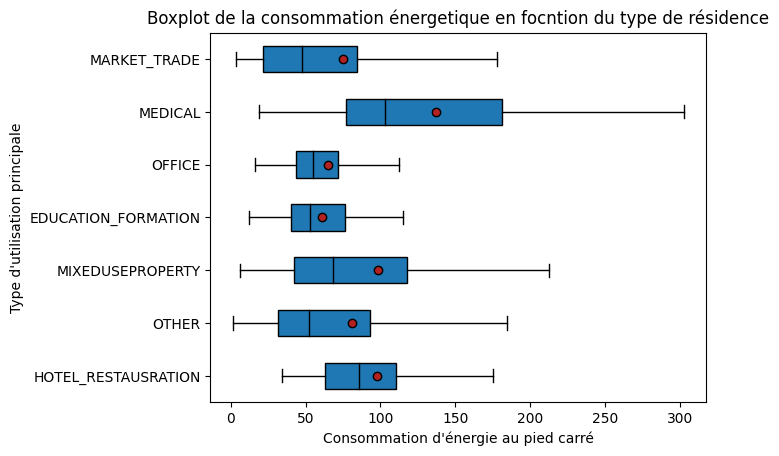

In [38]:
X = "PrimaryPropertyType"
Y = "SiteEUIWN(kBtu/sf)"

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boxplot de la consommation énergetique en focntion du type de résidence')
plt.xlabel("Consommation d'énergie au pied carré")
plt.ylabel("Type d'utilisation principale")
plt.show()

La disparité de consommation d'énergie entre les différents type d'utilisation pricinpale de la propriété est nettement visible. Les bâtiment à vocation médical ont distribution plus dispersée et une moyenne plus élévèe que les autres groupes.

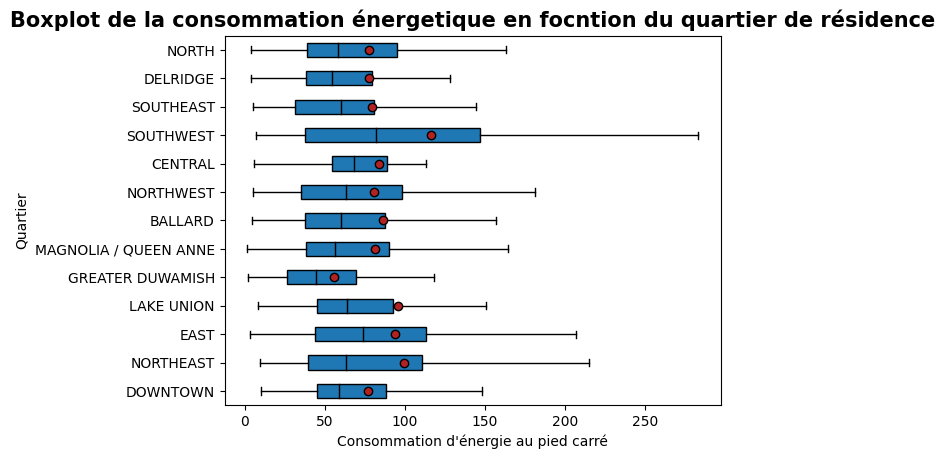

In [39]:
X = "Neighborhood"
Y = "SiteEUIWN(kBtu/sf)"

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boxplot de la consommation énergetique en focntion du quartier de résidence', fontsize = 15, fontweight='bold')
plt.xlabel("Consommation d'énergie au pied carré")
plt.ylabel("Quartier")
plt.show()

 On constate une disparité de la distribution de la consommation au sein des différents quartier. Le centre, le sud-est et Delriq

### **Anayse de la variabilité de la distribution d'émission CO2  au sein variables categorielles (ANOVA)**

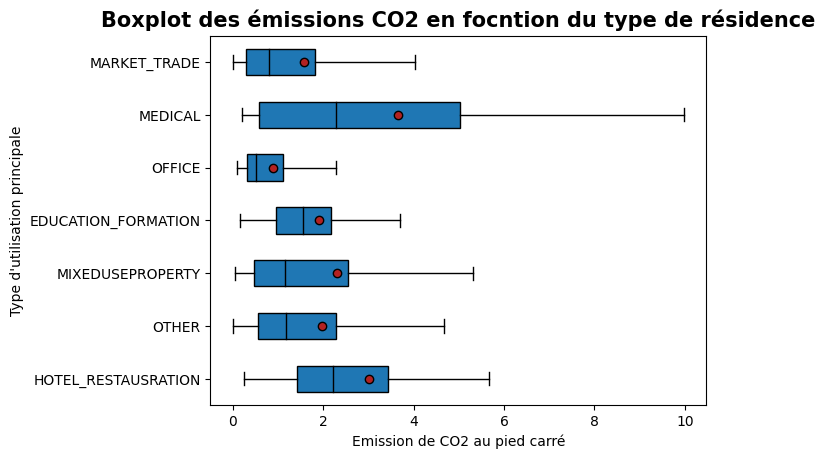

In [40]:
X = "PrimaryPropertyType"
Y = "GHGEmissionsIntensity"

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boxplot des émissions CO2 en focntion du type de résidence', fontsize = 15, fontweight='bold')
plt.xlabel("Emission de CO2 au pied carré")
plt.ylabel("Type d'utilisation principale")
plt.show()

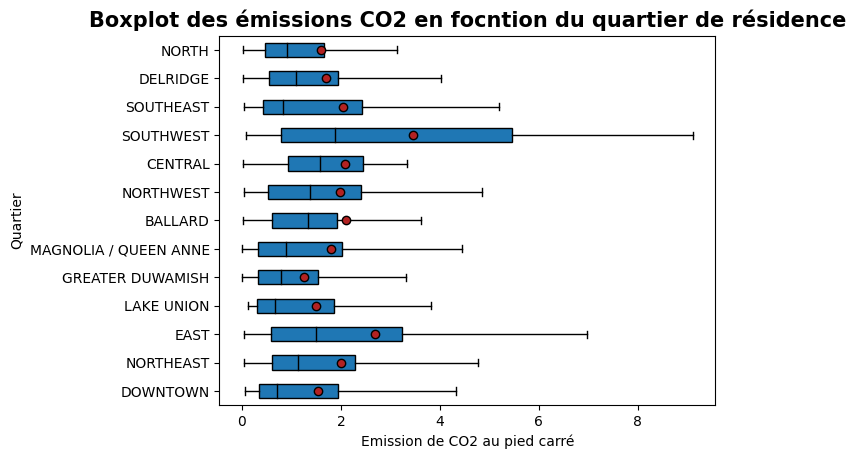

In [41]:
X = "Neighborhood"
Y = "GHGEmissionsIntensity"

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Boxplot des émissions CO2 en focntion du quartier de résidence', fontsize = 15, fontweight='bold')
plt.xlabel("Emission de CO2 au pied carré")
plt.ylabel("Quartier")
plt.show()

### **Encodage des variables categorielles**

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
onehot = OneHotEncoder(sparse=False)

In [43]:
cat_features = ['PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType']
mct = make_column_transformer((onehot, cat_features))

In [44]:
mct_data = mct.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
mct_DATA = df = pd.DataFrame(mct_data)

In [46]:
mct_DATA.columns = mct_DATA.columns.astype(str)

In [47]:
mct_DATA

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1439,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1440,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
data1 = data.reset_index(drop=True)

In [49]:
DATA= pd.merge(data1, mct_DATA, left_index=True, right_index=True)

In [50]:
DATA = DATA.drop(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt','LargestPropertyUseType', 'LargestPropertyUseTypeGFA'], axis=1)

In [51]:
DATA

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,Parking_pro,LargestUse_pro,Pro_vap,...,21,22,23,24,25,26,27,28,29,30
0,1.0,12,88434,7.456910e+06,84.300003,249.98,2.83,0.000000,100.000000,26.872820,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,11,103566,8.664479e+06,97.900002,295.86,2.86,14.545314,80.991831,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,41,956110,7.393711e+07,97.699997,2089.28,2.19,20.574829,79.121963,29.168781,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,10,61320,6.946800e+06,113.300003,286.43,4.67,0.000000,100.000000,31.877211,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,18,175580,1.465650e+07,118.699997,505.01,2.88,35.311539,70.306983,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1.0,1,18261,1.025432e+06,56.200001,20.33,1.11,0.000000,100.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1438,1.0,1,16000,1.053706e+06,65.900002,32.17,2.01,0.000000,100.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1439,1.0,1,13157,6.053764e+06,460.100006,223.54,16.99,0.000000,57.634719,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1440,1.0,1,14101,7.828413e+05,55.500000,22.11,1.57,0.000000,46.812283,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## **Modélisation**

In [52]:
DATA

,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,Parking_pro,LargestUse_pro,Pro_vap,...,21,22,23,24,25,26,27,28,29,30
0,1.0,12,88434,7.456910e+06,84.300003,249.98,2.83,0.000000,100.000000,26.872820,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,11,103566,8.664479e+06,97.900002,295.86,2.86,14.545314,80.991831,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,41,956110,7.393711e+07,97.699997,2089.28,2.19,20.574829,79.121963,29.168781,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,10,61320,6.946800e+06,113.300003,286.43,4.67,0.000000,100.000000,31.877211,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,18,175580,1.465650e+07,118.699997,505.01,2.88,35.311539,70.306983,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1.0,1,18261,1.025432e+06,56.200001,20.33,1.11,0.000000,100.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1438,1.0,1,16000,1.053706e+06,65.900002,32.17,2.01,0.000000,100.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1439,1.0,1,13157,6.053764e+06,460.100006,223.54,16.99,0.000000,57.634719,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1440,1.0,1,14101,7.828413e+05,55.500000,22.11,1.57,0.000000,46.812283,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
y = DATA['SiteEnergyUseWN(kBtu)']
x = DATA.drop(columns=['SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'  ], axis=1)

### **Standisation des jeux d'entrainement et de test (variabes explicatives)**

In [54]:
from sklearn import preprocessing

In [55]:
std_scale = preprocessing.StandardScaler().fit(x)
X = std_scale.transform(x)

### **Séparation du dataset en jeu d'entrainement et jeu de test**

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y,  test_size=0.2, random_state=1)

### **Modélisation avec le modèle Ridge**

In [57]:
from sklearn.linear_model import RidgeCV,Ridge
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [58]:
### Création du modèle de régression Ridge avec validation croisée
alphas=np.logspace(-5, 5, 11, 100)
ridge_model = RidgeCV(alphas=alphas, cv=5)

In [59]:
### Entrainement du modèle avecles données d'apprentissage
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
        cv=5)

In [60]:
# Obtenir le meilleur paramètre alpha
best_alpha = ridge_model.alpha_
print(f"Best alpha: {best_alpha}")

Best alpha: 1000.0


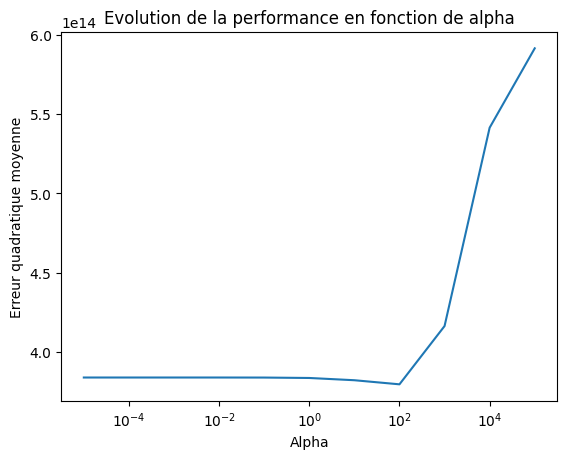

In [61]:
# Obtenir le meilleur paramètre alpha
mse_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

### **Affichage du score de chaque itération Kfold**

In [62]:
scores_train = cross_val_score(ridge_model, X_train, y_train, cv=5)
scores_test = cross_val_score(ridge_model, X_test, y_test, cv=5)
print(scores_train)
print(scores_test)
print("Moyenne : ", np.mean(scores_train), "et écart-type : ", np.std(scores_train))

[0.45773731 0.70163942 0.45576766 0.15142579 0.34729444]
[0.33333671 0.27154548 0.59608037 0.15528614 0.32734147]
Moyenne :  0.4227729241445761 et écart-type :  0.17855192697762232


In [63]:
### Prédire les valeurs pour les données d'apprentissage et de test
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

In [64]:
### Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)

### **Modélisation avec le modèle Linear regression**

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [66]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [67]:
### Evaluation du modèle sur les jeux d'entrainement et de test
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Calculer les performances
LinearR_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
LinearR_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
LinearR_train_r2 = r2_score(y_train, y_train_pred)
LinearR_test_r2 = r2_score(y_test, y_test_pred)
LinearR_train_mae = mean_absolute_error(y_train, y_train_pred)
LinearR_test_mae = mean_absolute_error(y_test, y_test_pred)

### **Modélisation avec les modèles Lasso et ElasticNet**

In [68]:
from sklearn.linear_model import Lasso, LassoCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score

In [69]:
### Créer des modèles de régression Lasso et ElasticNet avec validation croisée
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11, 100), cv=5)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

### Ajuster les modèles aux données d'apprentissage
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)

### Prédire les valeurs pour les données d'apprentissage et de test
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)
enet_train_pred = enet_model.predict(X_train)
enet_test_pred = enet_model.predict(X_test)

### Calculer le R2 et le RMSE pour les données d'apprentissage et de test
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
lasso_train_mae = mean_absolute_error(y_train, lasso_train_pred)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_pred)
enet_train_r2 = r2_score(y_train, enet_train_pred)
enet_test_r2 = r2_score(y_test, enet_test_pred)
enet_train_rmse = np.sqrt(mean_squared_error(y_train, enet_train_pred))
enet_test_rmse = np.sqrt(mean_squared_error(y_test, enet_test_pred))
enet_train_mae = mean_absolute_error(y_train, enet_train_pred)
enet_test_mae = mean_absolute_error(y_test, enet_test_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192109655181696.0, tolerance: 66037185061371.445
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189338150924352.0, tolerance: 66037185061371.445
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189059691434368.0, tolerance: 66037185061371.445
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergence

### **Modélisation avec le modèle KNN**

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [71]:
# Créer un modèle KNN pour la régression
knn = KNeighborsRegressor()
# Définir les hyperparamètres à tester avec GridSearchCV
param_grid = {'n_neighbors': [2,3, 5, 6,7, 9, 10,11,12, 13, 14, 15]}

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_k = grid_search.best_params_['n_neighbors']
best_k

2

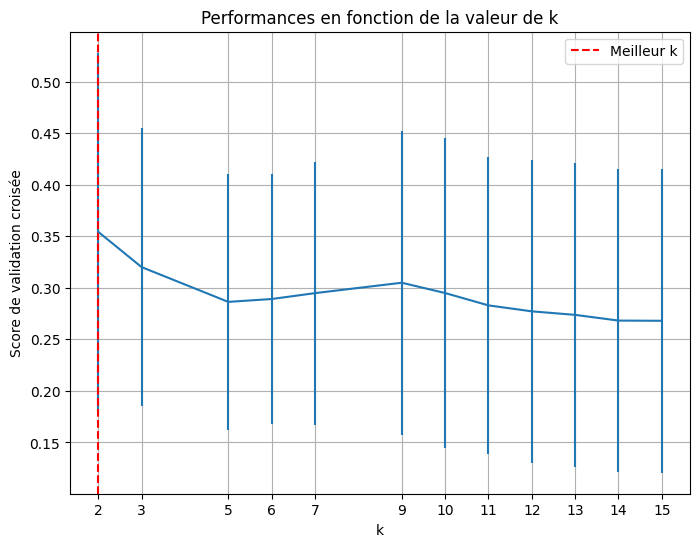

In [72]:
# Obtenir les scores de validation croisée pour chaque valeur de k
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

# Afficher les performances en fonction de k
plt.figure(figsize=(8, 6))
plt.errorbar(param_grid['n_neighbors'], mean_test_scores, yerr=std_test_scores)
plt.title('Performances en fonction de la valeur de k')
plt.xlabel('k')
plt.ylabel('Score de validation croisée')
plt.xticks(param_grid['n_neighbors'])
plt.axvline(best_k, color='r', linestyle='--', label='Meilleur k')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Entraîner le modèle avec les meilleurs hyperparamètres
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Prédire sur l'ensemble d'entraînement et de test
y_train_pred = knn_best.predict(X_train)
y_test_pred = knn_best.predict(X_test)

# Calculer les performances
KNN_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
KNN_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
KNN_train_r2 = r2_score(y_train, y_train_pred)
KNN_test_r2 = r2_score(y_test, y_test_pred)
KNN_train_mae = mean_absolute_error(y_train, y_train_pred)
KNN_test_mae = mean_absolute_error(y_test, y_test_pred)

### **Modélisation avec le modèle Random Forest Regressor**

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
parameters = {'n_estimators': [100, 150, 200, 250, 300, 400, 500], 'max_depth': [1,2,3,4, 5, 20],}
RandomF = RandomForestRegressor(random_state=0)
RFR_model = GridSearchCV(RandomF, parameters)

RFR_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 20],
                         'n_estimators': [100, 150, 200, 250, 300, 400, 500]})

In [76]:
# Prédire sur l'ensemble d'entraînement et de test
y_train_pred = RFR_model.predict(X_train)
y_test_pred = RFR_model.predict(X_test)

# Calculer les performances
RDFR_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
RDFR_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
RDFR_train_r2 = r2_score(y_train, y_train_pred)
RDFR_test_r2 = r2_score(y_test, y_test_pred)
RDFR_train_mae = mean_absolute_error(y_train, y_train_pred)
RDFR_test_mae = mean_absolute_error(y_test, y_test_pred)

### **Affichage des performations des modèles**

In [77]:
data_perf = {'Modèle': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'KNN', 'RandomForestRegressor'],
        'R2  train_set': [LinearR_train_r2, ridge_train_r2, lasso_train_r2, enet_train_r2, KNN_train_r2, RDFR_train_r2],
        'R2 test_set': [LinearR_test_r2, ridge_test_r2, lasso_test_r2, enet_test_r2, KNN_test_r2, RDFR_test_r2],
        'RMSE train_set': [LinearR_train_rmse, ridge_train_rmse, lasso_train_rmse, enet_train_rmse, KNN_train_rmse, RDFR_train_rmse],
        'RMSE test_set': [LinearR_test_rmse, ridge_test_rmse, lasso_test_rmse, enet_test_rmse, KNN_test_rmse, RDFR_test_rmse],
        'MAE train_set': [LinearR_train_mae, ridge_train_mae, lasso_train_mae, enet_train_mae, KNN_train_mae, RDFR_train_mae],
        'MAE test_set': [LinearR_test_mae, ridge_test_mae, lasso_test_mae, enet_test_mae, KNN_test_mae, RDFR_test_mae]}

df_perf = pd.DataFrame(data_perf)
df_perf

,Modèle,R2 train_set,R2 test_set,RMSE train_set,RMSE test_set,MAE train_set,MAE test_set
0,Linear Regression,0.444973,0.428648,1.820813e+07,1.385676e+07,6.520482e+06,6.460175e+06
1,Ridge,0.358168,0.415040,1.958030e+07,1.402080e+07,5.788123e+06,5.364376e+06
2,Lasso,0.442246,0.432890,1.825282e+07,1.380522e+07,6.358073e+06,6.320239e+06
3,ElasticNet,0.437009,0.433678,1.833831e+07,1.379562e+07,6.150740e+06,6.186189e+06
4,KNN,0.840320,0.223606,9.766384e+06,1.615291e+07,2.917389e+06,5.388879e+06
5,RandomForestRegressor,0.915153,0.625061,7.119142e+06,1.122509e+07,1.801836e+06,4.112498e+06


A partir de ce tableau de comparaison de performances, nous pouvons deduire que le modèle RandomForestRegressor est le meilleur modèle parmis les modèles entrainés. En effet, ce modèle préente le R2 le plus elévé mais le RMSE et le MAE les plus bas. Et ceci tant au niveau du train set qu'au niveau du test set

### **Feature importance**

In [78]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.2 MB/s eta 0:00:00


In [79]:
import shap
shap.initjs()

In [99]:
explainer = shap.Explainer(RFR_model)
shap_values = explainer(X_test)

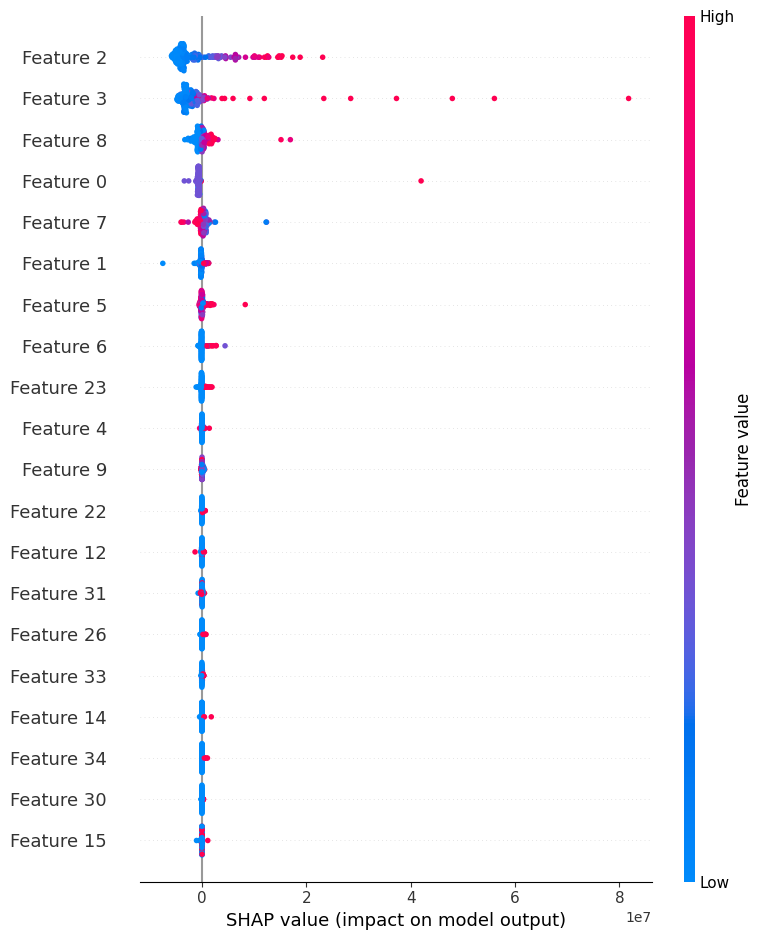

In [100]:
shap.summary_plot(shap_values, X_test)

## **EnergyStarScore en incluant la variable 'ENERGYSTARScore''**

In [82]:
df = pd.read_csv("/content/drive/MyDrive/Projet 3/2016_Building_Energy_Benchmarking.csv")
df.dropna(subset= ['ENERGYSTARScore'], inplace=True)

In [83]:
ENERG = df['ENERGYSTARScore']

In [84]:
ENERG

0        60.0
1        61.0
2        43.0
3        56.0
4        75.0
        ...  
3357    100.0
3358     99.0
3366     75.0
3369     93.0
3371     46.0
Name: ENERGYSTARScore, Length: 2533, dtype: float64

In [85]:
DATA2 = pd.merge(data, ENERG, left_index=True, right_index=True)

In [86]:
### Encodage
cat_features = ['PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType']
mct = make_column_transformer((onehot, cat_features))

In [87]:
mct_data2 = mct.fit_transform(DATA2)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [88]:
mct_DATA2 = pd.DataFrame(mct_data2)

In [89]:
mct_DATA2.columns = mct_DATA2.columns.astype(str)

In [90]:
DATA2 = DATA2.reset_index(drop=True)

In [91]:
DATA_EN= pd.merge(data1, mct_DATA2, left_index=True, right_index=True)

In [92]:
DATA_ENERGSCORE = DATA_EN.drop(['PrimaryPropertyType', 'Neighborhood', 'YearBuilt','LargestPropertyUseType'], axis=1)

### **Modelisation avec Random Forest Regressor**

In [93]:
y = DATA_ENERGSCORE['SiteEnergyUseWN(kBtu)']
x = DATA_ENERGSCORE.drop(columns=['SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'  ], axis=1)

In [94]:
std_scale = preprocessing.StandardScaler().fit(x)
X = std_scale.transform(x)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

In [96]:
parameters = {'n_estimators': [100, 150, 200, 250, 300, 400, 500], 'max_depth': [1,2,3,4, 5, 20],}
RFR_model = RandomForestRegressor(random_state=0)
clf = GridSearchCV(RFR_model, parameters)

RFR_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [97]:
# Prédire sur l'ensemble d'entraînement et de test
y_train_pred = RFR_model.predict(X_train)
y_test_pred = RFR_model.predict(X_test)

# Calculer les performances
RDFR_train_rmse_escore = mean_squared_error(y_train, y_train_pred, squared=False)
RDFR_test_rmse_escore = mean_squared_error(y_test, y_test_pred, squared=False)
RDFR_train_r2_escore = r2_score(y_train, y_train_pred)
RDFR_test_r2_escore = r2_score(y_test, y_test_pred)
RDFR_train_mae_escore = mean_absolute_error(y_train, y_train_pred)
RDFR_test_mae_escore = mean_absolute_error(y_test, y_test_pred)

### **Comparaison des deux prédiction**

In [98]:
data_comp = {'Modèle': [ 'RandomForestRegressor', 'RandomForestRegressor_ENERGYSCORE'],
        'R2  train_set': [RDFR_train_r2, RDFR_train_r2_escore],
        'R2 test_set': [RDFR_test_r2, RDFR_test_r2_escore],
        'RMSE train_set': [RDFR_train_rmse, RDFR_train_rmse_escore],
        'RMSE test_set': [RDFR_test_rmse, RDFR_test_rmse_escore],
        'MAE train_set': [RDFR_train_mae, RDFR_train_mae_escore],
        'MAE test_set': [RDFR_test_mae, RDFR_test_mae_escore]}

df_comp = pd.DataFrame(data_comp)
df_comp

,Modèle,R2 train_set,R2 test_set,RMSE train_set,RMSE test_set,MAE train_set,MAE test_set
0,RandomForestRegressor,0.915153,0.625061,7.119142e+06,1.122509e+07,1.801836e+06,4.112498e+06
1,RandomForestRegressor_ENERGYSCORE,0.950158,0.372456,5.102798e+06,3.309283e+07,1.839686e+06,7.289378e+06


Le feature EnergyStarScore ameliore la performance du modèle sur le train set. Cepandant, elle l'impact négativement sur le test set car il y a baisse du performances.